In [1]:
from support import *

In [2]:
df = data()
df

,sqfeet,rent
0,750,1160
1,800,1200
2,850,1280
3,900,1450
4,950,2000


## Train tree using sign vector

In [3]:
M = 3
eta = 1
gbm = l1boost(df, 'rent', eta, M)
splits = gbm.splits()
print("Splits", splits)

mse = [mean_squared_error(df.rent, df['F'+str(s)]) for s in range(M+1)]
mae = [mean_absolute_error(df.rent, df['F'+str(s)]) for s in range(M+1)]
print(mse)
print(mae)
df

Splits [825.0, 775.0, 925.0]
[113620.0, 66440.0, 64840.0, 6180.0]
[218.0, 152.0, 148.0, 40.0]


,sqfeet,rent,F0,res1,sign1,delta1,F1,res2,sign2,delta2,F2,res3,sign3,delta3,F3
0,750,1160,1280.0,-120.0,-1.0,-100.0,1180.0,-20.0,-1.0,-20.0,1160.0,0.0,0.0,-5.0,1155.0
1,800,1200,1280.0,-80.0,-1.0,-100.0,1180.0,20.0,1.0,10.0,1190.0,10.0,1.0,-5.0,1185.0
2,850,1280,1280.0,0.0,0.0,170.0,1450.0,-170.0,-1.0,10.0,1460.0,-180.0,-1.0,-5.0,1455.0
3,900,1450,1280.0,170.0,1.0,170.0,1450.0,0.0,0.0,10.0,1460.0,-10.0,-1.0,-5.0,1455.0
4,950,2000,1280.0,720.0,1.0,170.0,1450.0,550.0,1.0,10.0,1460.0,540.0,1.0,540.0,2000.0


In [4]:
print(gbm)

Tree 0: split @ 825.0; [-120.  -80.] | [  0. 170. 720.]
Tree 1: split @ 775.0; [-20.] | [  20. -170.    0.  550.]
Tree 2: split @ 925.0; [   0.   10. -180.  -10.] | [540.]



In [5]:
o = ""
for i in range(len(df)):
    o += " & ".join([f"{v:.2f}" for v in df.iloc[i,:][['sqfeet','rent','F0','res1','sign1']]]) + "\\\\" + "\n"

#F = df[['sqfeet','rent',F0','F1','F2','F3']]
for i in range(len(df)):
    o += " & ".join([f"{v:.2f}" for v in df.iloc[i,:][['delta1','F1','res2','sign2','delta2','F2','res3','sign3','delta3','F3']]]) + r"\\" + "\n"

o = o.replace(".00", "")
print(o)

750 & 1160 & 1280 & -120 & -1\\
800 & 1200 & 1280 & -80 & -1\\
850 & 1280 & 1280 & 0 & 0\\
900 & 1450 & 1280 & 170 & 1\\
950 & 2000 & 1280 & 720 & 1\\
-100 & 1180 & -20 & -1 & -20 & 1160 & 0 & 0 & -5 & 1155\\
-100 & 1180 & 20 & 1 & 10 & 1190 & 10 & 1 & -5 & 1185\\
170 & 1450 & -170 & -1 & 10 & 1460 & -180 & -1 & -5 & 1455\\
170 & 1450 & 0 & 0 & 10 & 1460 & -10 & -1 & -5 & 1455\\
170 & 1450 & 550 & 1 & 10 & 1460 & 540 & 1 & 540 & 2000\\



## Plot F0 vs rent and show sign vectors

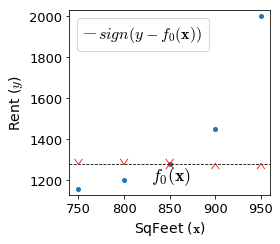

In [6]:
f0 = df.rent.median()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 3.5), sharey=True)

ax = axes
line1, = ax.plot(df.sqfeet,df.rent,'o', linewidth=.8, markersize=4, label="$y$")
# fake a line to get smaller red dot
line2, = ax.plot([0,0],[0,0], c='r', markersize=4, label=r"$sign(y-f_0({\bf x}))$", linewidth=.8)
ax.plot([df.sqfeet.min()-10,df.sqfeet.max()+10], [f0,f0],
         linewidth=.8, linestyle='--', c='k')
ax.set_xlim(df.sqfeet.min()-10,df.sqfeet.max()+10)
ax.set_ylim(df.rent.min()-30, df.rent.max()+30)
ax.text(830, f0-80, r"$f_0({\bf x})$", fontsize=18)

ax.set_ylabel(r"Rent ($y$)", fontsize=14)
ax.set_xlabel(r"SqFeet (${\bf x}$)", fontsize=14)

# draw arrows
for x,y,yhat in zip(df.sqfeet,df.rent,df.F0):
    if np.sign(y-yhat)==0:
        # draw up/down to get X on 0
        draw_vector(ax, x, yhat, 0, -2, df.rent.max()-df.rent.min())
        draw_vector(ax, x, yhat, 0, 2, df.rent.max()-df.rent.min())
    else:
        draw_vector(ax, x, yhat, 0, np.sign(y-yhat)*2, df.rent.max()-df.rent.min())
    
ax.legend(handles=[line2], fontsize=16,
          loc='upper left', 
          labelspacing=.1,
          handletextpad=.2,
          handlelength=.7,
          frameon=True)

plt.tight_layout()
plt.show()

## Show global weight not per leaf

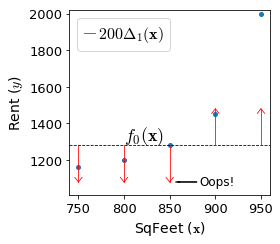

In [7]:
f0 = df.rent.median()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 3.5), sharey=True)

ax = axes
line1, = ax.plot(df.sqfeet,df.rent,'o', linewidth=.8, markersize=4, label="$y$")
# fake a line to get smaller red dot
line2, = ax.plot([0,0],[0,0], c='r', markersize=4, label=r"$200 \Delta_1({\bf x})$", linewidth=.8)
ax.plot([df.sqfeet.min()-10,df.sqfeet.max()+10], [f0,f0],
         linewidth=.8, linestyle='--', c='k')
ax.set_xlim(df.sqfeet.min()-10,df.sqfeet.max()+10)
ax.set_ylim(df.rent.min()-150, df.rent.max()+20)
ax.text(800, f0+30, r"$f_0({\bf x})$", fontsize=18)

ax.arrow(880,f0-200, -20, 0, linewidth=.8, head_width=6, head_length=4)
ax.text(883, f0-200-15, "Oops!", fontsize=12)

ax.set_ylabel(r"Rent ($y$)", fontsize=14)
ax.set_xlabel(r"SqFeet (${\bf x}$)", fontsize=14)

# draw arrows
for x,y,yhat in zip(df.sqfeet,df.rent,df.F0):
    draw_vector(ax, x, yhat, 0, (np.sign(y-yhat) if y-yhat>0 else -1)*200, df.rent.max()-df.rent.min())
    
ax.legend(handles=[line2], fontsize=16,
          loc='upper left', 
          labelspacing=.1,
          handletextpad=.2,
          handlelength=.7,
          frameon=True)

plt.tight_layout()
plt.show()

## Using leaf-specific Weights

In [8]:
# get left/right median to use as weights
t1 = gbm.stumps[0]
w1 = int(np.abs(t1.predict(t1.split-1)))
w2 = int(np.abs(t1.predict(t1.split+1)))
w1,w2

(100, 170)

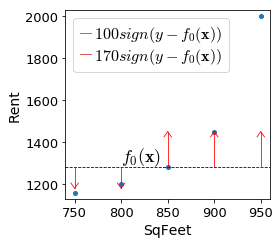

In [9]:
f0 = df.rent.median()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 3.5), sharey=False)

def draw_weights(ax,scale=0.03):
    line1, = ax.plot(df.sqfeet,df.rent,'o', linewidth=.8, markersize=4, label="$y$")
    # fake a line to get smaller red dot
    line2, = ax.plot([0,0],[0,0], c=bookcolors['red'], markersize=4, label=r"$"+str(w1)+r"sign(y-f_0({\bf x}))$", linewidth=.8)
    line3, = ax.plot([0,0],[0,0], c=bookcolors['red'], markersize=4, label=r"$"+str(w2)+r"sign(y-f_0({\bf x}))$", linewidth=.8)
    ax.plot([df.sqfeet.min()-10,df.sqfeet.max()+10], [f0,f0],
             linewidth=.8, linestyle='--', c='k')
    ax.set_xlim(df.sqfeet.min()-10,df.sqfeet.max()+10)
    ax.text(800, f0+30, r"$f_0({\bf x})$", fontsize=18)

    ax.set_ylabel(r"Rent", fontsize=14)
    ax.set_xlabel(r"SqFeet", fontsize=14)

    draw_stage_residual(ax, df, 1, scale=scale)

    ax.legend(handles=[line2,line3], fontsize=16,
              loc='upper left', 
              labelspacing=.1,
              handletextpad=.2,
              handlelength=.7,
              frameon=True)

ax = axes
draw_weights(ax)
#draw_weights(axes[1], 0.005)

ax.set_ylim(df.rent.min()-30, df.rent.max()+30)
#axes[1].set_ylim(df.rent.min()-10, 1500)
#axes[1].set_yticks([1150,1200,1250,1300])

plt.tight_layout()
plt.savefig('/tmp/s.svg')
plt.show()

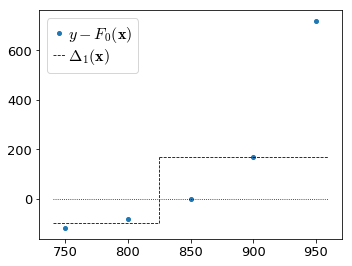

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,3.8))
plot_stump(ax, df.sqfeet, df.res1, df.delta1, splits[0], stage=1)
plt.tight_layout()
plt.show()

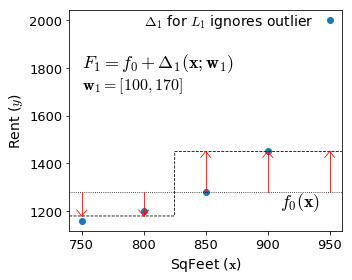

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))

plot_composite(ax, df, gbm, 1, eta=1.0, legend=False)

ax.plot([df.sqfeet.min()-10,df.sqfeet.max()+10], [f0,f0],
         linewidth=.8, linestyle=':', c='k')

for x,d0,delta in zip(df.sqfeet,df[f'F0'],df[f'F1']):
    draw_vector(ax, x, d0, 0, delta-d0, df.rent.max()-df.rent.min())

ax.text(750, 1800, r"$F_1 = f_0 + \Delta_1({\bf x}; {\bf w}_1)$", fontsize=18)
ax.text(750, 1710, r"${\bf w}_1 = ["+str(w1)+","+str(w2)+"]$", fontsize=16)
ax.text(910, f0-60, r"$f_0({\bf x})$", fontsize=18)

ax.set_ylabel(r"Rent ($y$)", fontsize=14)
ax.set_xlabel(r"SqFeet (${\bf x}$)", fontsize=14)
ax.set_xlim(df.sqfeet.min()-10,df.sqfeet.max()+10)

ax.text(800,1980, "$\Delta_1$ for $L_1$ ignores outlier", fontsize=14)
plt.tight_layout()

plt.show()

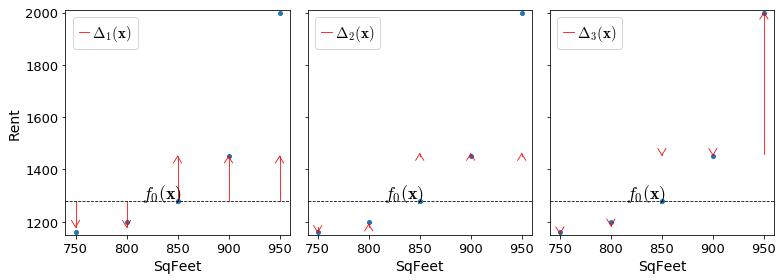

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharey=True)

# PLOT 1

ax = axes[0]
f0 = df.rent.median()
line1, = ax.plot(df.sqfeet,df.rent,'o', linewidth=.8, markersize=4, label="$y$")
draw_stage_residual(ax, df, stage=1)
# fake a line to get smaller red dot
line2, = ax.plot(700,1000,linewidth=.8, c='r', markersize=4)
ax.plot([df.sqfeet.min()-10,df.sqfeet.max()+10], [f0,f0],
         linewidth=.8, linestyle='--', c='k')
ax.text(815, f0+10, r"$f_0({\bf x})$", fontsize=18)
ax.set_xlim(df.sqfeet.min()-10,df.sqfeet.max()+10)
ax.set_ylim(df.rent.min()-10, df.rent.max()+10)
ax.set_xlabel(r"SqFeet", fontsize=14)
ax.set_ylabel(r"Rent", fontsize=14)
ax.legend(handles=[line2], fontsize=15,
          loc='upper left', 
          labelspacing=.1,
          handletextpad=.2,
          handlelength=.7,
          frameon=True,
          labels=["$\Delta_1({\\bf x})$"])

# PLOT 2

ax = axes[1]
line1, = ax.plot(df.sqfeet,df.rent,'o', linewidth=.8, markersize=4, label="$y$")
draw_stage_residual(ax, df, stage=2)
# fake a line to get smaller red dot
line2, = ax.plot(700,1000,linewidth=.8, c='r', markersize=4)
ax.plot([df.sqfeet.min()-10,df.sqfeet.max()+10], [f0,f0],
         linewidth=.8, linestyle='--', c='k')
ax.text(815, f0+10, r"$f_0({\bf x})$", fontsize=18)
ax.set_xlim(df.sqfeet.min()-10,df.sqfeet.max()+10)
ax.set_ylim(df.rent.min()-10, df.rent.max()+10)
ax.set_xlabel(r"SqFeet", fontsize=14)
ax.legend(handles=[line2], fontsize=15,
          loc='upper left', 
          labelspacing=.1,
          handletextpad=.2,
          handlelength=.7,
          frameon=True,
          labels=["$\Delta_2({\\bf x})$"])

# PLOT 3

ax = axes[2]
line1, = ax.plot(df.sqfeet,df.rent,'o', linewidth=.8, markersize=4, label="$y$")
draw_stage_residual(ax, df, stage=3)
# fake a line to get smaller red dot
line2, = ax.plot(700,1000,linewidth=.8, c='r', markersize=4)
ax.plot([df.sqfeet.min()-10,df.sqfeet.max()+10], [f0,f0],
         linewidth=.8, linestyle='--', c='k')
ax.text(815, f0+10, r"$f_0({\bf x})$", fontsize=18)
ax.set_xlim(df.sqfeet.min()-10,df.sqfeet.max()+10)
ax.set_ylim(df.rent.min()-10, df.rent.max()+10)
ax.set_xlabel(r"SqFeet", fontsize=14)
ax.legend(handles=[line2], fontsize=15,
          loc='upper left', 
          labelspacing=.1,
          handletextpad=.2,
          handlelength=.7,
          frameon=True,
          labels=["$\Delta_3({\\bf x})$"])

plt.tight_layout()
plt.savefig('/tmp/s.svg')
plt.show()

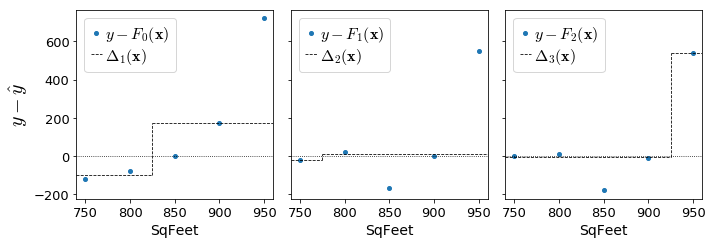

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), sharey=True)

axes[0].set_ylabel(r"$y-\hat y$", fontsize=20)
for a in range(3):
    axes[a].set_xlabel(r"SqFeet", fontsize=14)
    axes[a].set_xlim(df.sqfeet.min()-10,df.sqfeet.max()+10)

plot_stump(axes[0], df.sqfeet, df.res1, df.delta1, splits[0], stage=1)

plot_stump(axes[1], df.sqfeet, df.res2, df.delta2, splits[1], stage=2)

plot_stump(axes[2], df.sqfeet, df.res3, df.delta3, splits[2], stage=3)

plt.tight_layout()
        
plt.savefig('/tmp/t.svg')
plt.show()

## Show model stages

In [14]:
df = data()
eta = 1
M = 3
gbm = l1boost(df, 'rent', eta, M)
df['deltas12'] = 0.7 * df[['delta1','delta2']].sum(axis=1)
df['deltas123'] = 0.7 * df[['delta1','delta2','delta3']].sum(axis=1)
df['deltas'] = 0.7 * df[['delta1','delta2','delta3']].sum(axis=1) # sum deltas

df[['sqfeet','rent','F0','delta1','delta2','delta3','deltas','deltas12','deltas123']]

,sqfeet,rent,F0,delta1,delta2,delta3,deltas,deltas12,deltas123
0,750,1160,1280.0,-100.0,-20.0,-5.0,-87.5,-84.0,-87.5
1,800,1200,1280.0,-100.0,10.0,-5.0,-66.5,-63.0,-66.5
2,850,1280,1280.0,170.0,10.0,-5.0,122.5,126.0,122.5
3,900,1450,1280.0,170.0,10.0,-5.0,122.5,126.0,122.5
4,950,2000,1280.0,170.0,10.0,540.0,504.0,126.0,504.0


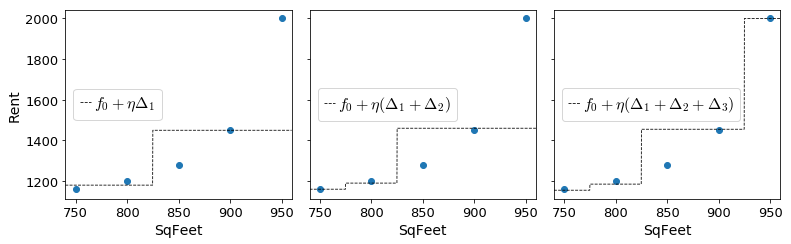

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11.1, 3.5), sharey=True)

axes[0].set_ylabel(r"Rent", fontsize=14)
for a in range(3):
    axes[a].set_xlabel(r"SqFeet", fontsize=14)
    axes[a].set_xlim(df.sqfeet.min()-10,df.sqfeet.max()+10)

plot_composite(axes[0], df, gbm, 1)
plot_composite(axes[1], df, gbm, 2)
plot_composite(axes[2], df, gbm, 3)

plt.tight_layout()
plt.savefig('/tmp/u.svg')
plt.show()